In [1]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [35]:
# Menampilkan Dataset
df = pd.read_excel('data_kelahiran_cleaned.xlsx')
df.head()

,Kecamatan,Puskesmas,Laki_Laki_Hidup,Laki_Laki_Mati,Laki_Laki_Total,Perempuan_Hidup,Perempuan_Mati,Perempuan_Total,Total_Hidup,Total_Mati,Total_Kelahiran
0,GETASAN,GETASAN,145,4,149,163,3,166,308,7,315
1,GETASAN,JETAK,140,3,143,145,0,145,285,3,288
2,TENGARAN,TENGARAN,426,5,431,438,4,442,864,9,873
3,SUSUKAN,SUSUKAN,271,2,273,243,1,244,514,3,517
4,KALIWUNGU,KALIWUNGU,147,3,150,151,0,151,298,3,301


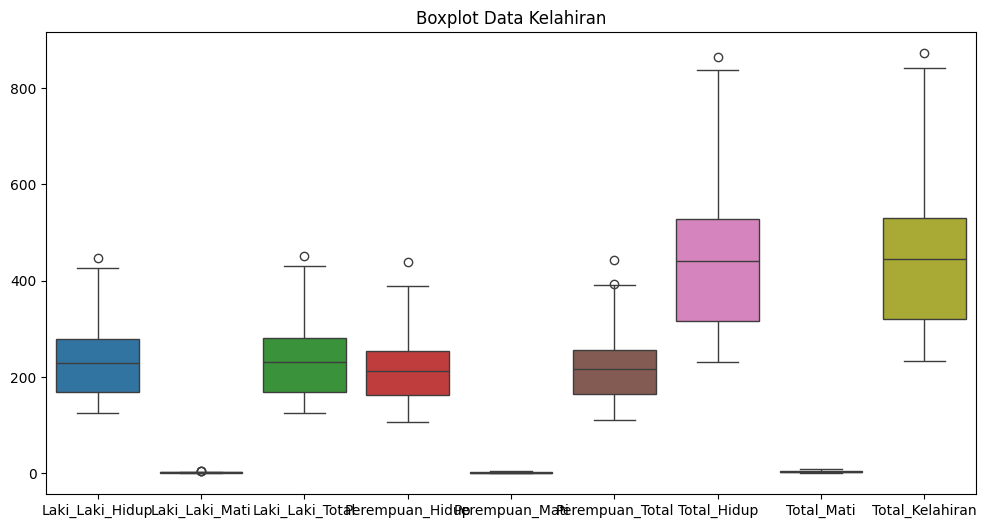

In [36]:
# Menampilkan Deteksi Pencilan
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Kecamatan', axis=1))
plt.title('Boxplot Data Kelahiran')
plt.show()

In [46]:
# Standardisasi Data (z-score)
X = df.drop(columns=['Puskesmas', 'Kecamatan'], axis=1)
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

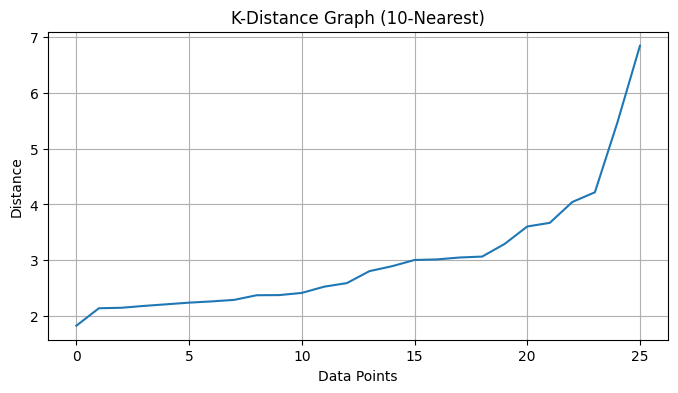

In [39]:
# Cari nilai Eps (bila ingin eksploratif)

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_Scaled)
distances, indices = neighbors_fit.kneighbors(X_Scaled)
distances = np.sort(distances[:, 9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-Distance Graph (10-Nearest)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [65]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(X_Scaled)
df['Cluster'] = dbscan.labels_

In [66]:
# Cek label hasil DBSCAN
labels = dbscan.labels_
unique_labels = set(labels)
print("Label unik DBSCAN:", unique_labels)
print("Jumlah cluster (tidak termasuk noise):", len(unique_labels) - (1 if -1 in labels else 0))
print("Jumlah data noise:", np.sum(labels == -1))

Label unik DBSCAN: {np.int64(0), np.int64(1), np.int64(-1)}
Jumlah cluster (tidak termasuk noise): 2
Jumlah data noise: 1


In [67]:
# Cek dulu jumlah cluster yang terbentuk (selain noise)
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

# Evaluasi Silhouette Score hanya jika ada lebih dari 1 cluster
if n_clusters > 1:
    # Ambil hanya data yang bukan noise
    mask = dbscan.labels_ != -1
    silhouette_avg = silhouette_score(X_Scaled[mask], dbscan.labels_[mask])
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print('Silhouette Score tidak dapat dihitung karena hanya ada satu cluster atau semua data adalah noise.')

Silhouette Score: 0.53
